## Tensorflow Tutorial

Here I write about my new learning and experiments with the tensorflow from the Coursera specialization "TensorFlow 2 for Deep Learning" from Imperial College. 

List of Contents:

[Import Tensorflow](#p1)

[Buidling a Sequential Model](#p2)

[Building a Convolution Neural Network](#p3)

<a id="p1"></a>
### Import TensorFlow

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.3.1'

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, Conv2D, MaxPooling2D

<a id="p2"></a>
### Building a Sequential model

Let's create an instance of the Sequential class. This model is a feedforward network with a single hidden layer. We have 64 units in the first Dense layer.

In [5]:
model = Sequential([Dense(64, activation="relu"),
                    Dense(10, activation="softmax")])

We can also specify what shape the input data would be at the built stage. For example, a one-dimensional vector of size 784 in the following example.

In [6]:
model = Sequential([Dense(64, activation="relu", input_shape=(784,)),
                    Dense(10, activation="softmax")])

An alternative way of building the exact same model:

In [7]:
model = Sequential()

model.add(Dense(64, activation="relu", input_shape=(784,)))
model.add(Dense(10, activation="softmax"))

Build another feedforward neural network model

In [17]:
model1 = Sequential([Flatten(input_shape=(28,28)),
                     Dense(16, activation="relu", name="layer_1"),
                     Dense(16, activation="relu"),
                     Dense(10, activation="softmax")
                    ])

In [18]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_15 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


<a id="p3"></a>
### Building a Convolutional Neural Network
Let's see how we can build a convolutional network. In this example, let's say the input is an image of 32 by 32 pixel with three color channels. Our kernel is convolving over the image with a window of 3x3 pixels, using 16 filters. 

In [22]:
model2 = Sequential([
    Conv2D(16, (3,3), activation="relu", input_shape=(32,32,3)), #(None, 30, 30, 16)
    MaxPooling2D((3, 3)), #(None, 10, 10, 16)
    Flatten(), #(None, 1600)
    Dense(64, activation="relu"), #(None, 64)
    Dense(10, activation="softmax") #(None, 10)
])

Another example

In [37]:
model3 = Sequential([
    Conv2D(16, (3,3), padding="SAME", strides=2, activation="relu", input_shape=(28,28,1), data_format="channels_last"),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation="softmax") 
])

In [38]:
model3.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                2570      
Total params: 2,730
Trainable params: 2,730
Non-trainable params: 0
_________________________________________________________________


### Initializing weights and biases
We can use `kernel_initialiser` and `bias_initialiser` to initialize our own weights and biases in a neural network model.

In [39]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D

In [40]:
model4 = Sequential([
    Conv1D(filters=16, kernel_size=3, input_shape=(128,64), kernel_initializer='random_uniform', bias_initializer='zeros', activation='relu'),
    MaxPooling1D(pool_size=4),
    Flatten(),
    Dense(64, kernel_initializer='he_uniform', bias_initializer='ones',activation='relu')
])

In [43]:
model4.add(Dense(64, kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), bias_initializer=tf.keras.initializers.Constant(value=0.4), activation='relu'))

model4.add(Dense(8, kernel_initializer=tf.keras.initializers.Orthogonal(gain=1.0, seed=None), bias_initializer=tf.keras.initializers.Constant(value=0.4), activation='relu'))

In [44]:
import tensorflow.keras.backend as K

In [46]:
#Define a custom initializer

def my_init(shape, dtype=None):
    return K.random_normal(shape, dtype=dtype)

model4.add(Dense(64, kernel_initializer=my_init))

In [47]:
model4.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 126, 16)           3088      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 31, 16)            0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 496)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 64)                31808     
_________________________________________________________________
dense_26 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_27 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_29 (Dense)             (None, 64)              

In [49]:
model4.layers

In [50]:
[layer for layer in model4.layers if len(layer.weights)>0]

#### Visualizing the initialized weights and biases

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

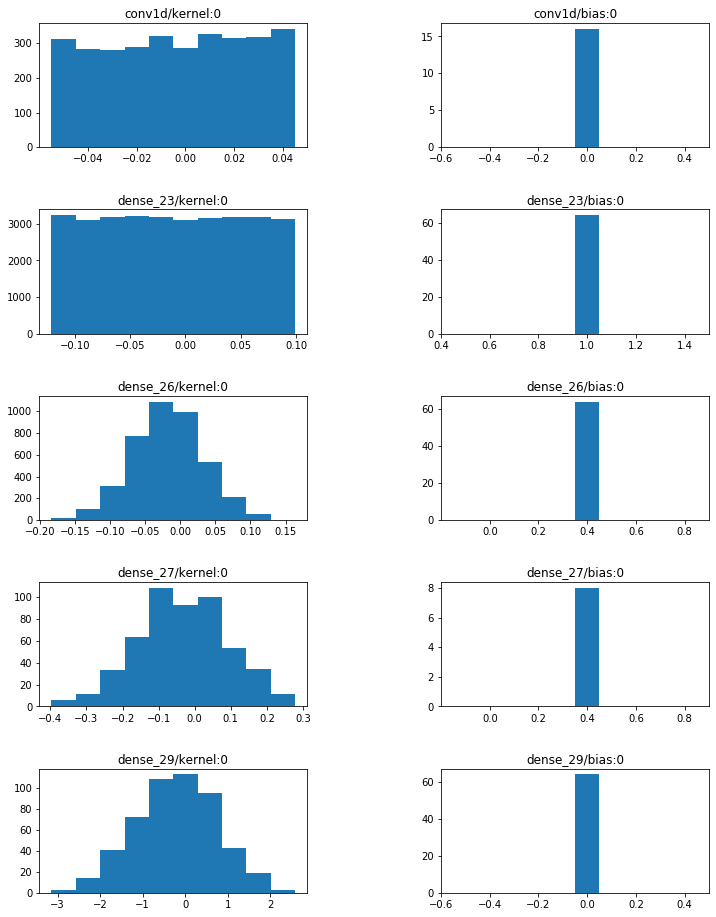

In [58]:
fig, axes = plt.subplots(5, 2, figsize=(12,16))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

#filter out the pooling and flatten layers that don't have any weights
weight_layers = [layer for layer in model4.layers if len(layer.weights)>0]

for i, layer in enumerate(weight_layers):
    for j in [0, 1]:
        axes[i, j].hist(layer.weights[j].numpy().flatten(), align='left')
        axes[i, j].set_title(layer.weights[j].name)

### The compile method

In [66]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy','mae'])

In [67]:
print(model.loss)
print(model.optimizer)
print(model.metrics)

sparse_categorical_crossentropy
[]


In [71]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
             metrics=[acc, mae])

In [72]:
print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


In [3]:
from keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train = X_train/255.

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [19]:
# model.compile(optimizer="adam",
#              loss="sparse_categorical_crossentropy",
#              metrics=['accuracy'])

# model.fit(X_train, y_train, epochs=3, batch_size=32)

